In [97]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
# Categories array
categories = [ # each category represent the ML-answer from as many separate models
                'is_blurry',
                'has_identified_objects',
                'contains_common_identified_objects',
                'contains_text',
                'has_exif_data',
                'is_created_at_time_near_neighbor_file',
                'is_created_geographically_close_to_neighbor_file',
                'seems_like_screenshot',
                'seems_very_dark',
                'seems_very_light',
            ]

In [82]:
# Create representation of image files
random_array = np.random.random(size=(10000, 10))
print(random_array)

[[0.70747749 0.66072782 0.57780611 ... 0.85119963 0.36016484 0.63035278]
 [0.52197547 0.54375634 0.37180225 ... 0.81113975 0.17045639 0.17536897]
 [0.92408447 0.33156122 0.07295558 ... 0.38543798 0.64525088 0.07570238]
 ...
 [0.99464429 0.93546201 0.36977525 ... 0.96248705 0.89165154 0.28549936]
 [0.51176687 0.34095275 0.58264561 ... 0.64545097 0.63037878 0.63257993]
 [0.03560563 0.08851918 0.9019421  ... 0.89487859 0.92912504 0.32854766]]


In [85]:
# create an answer array (y)
y = np.ndarray((10000,))
# print(y)

# y(keep=0) == file.delete()

# and random_array[index][2] == 1 and random_array[index][3] < 0.3

for index, answer in enumerate(y):
    if random_array[index][0] < 0.2:
        y[index] = 1
        # random_array[index][10] = 1
    else:
        y[index] = 0
        # random_array.append[index][10] = 0


print(y)
print(np.count_nonzero(y, axis=0))

[0. 0. 0. ... 0. 0. 1.]
1950


In [ ]:
# the Numpy way
#y = (random_array[0] < 0.2 and random_array[index][2] == 1 and random_array[index][3] < 0.3)

In [89]:
# build the dataframes
X = pd.DataFrame(random_array, columns=categories)
# print(X) -- DONE!
# SEries är endimensionell
y = pd.Series(y, dtype='int8')
print(y) #-- DONE!



0       0
1       0
2       0
3       1
4       0
       ..
9995    0
9996    1
9997    0
9998    0
9999    1
Length: 10000, dtype: int8


In [90]:
# split X and y data training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)


In [94]:
# Running my first ever logistic regression
logreg = LogisticRegression(random_state=16)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print(y_pred)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[0 0 0 ... 0 0 1]
[[2026    1]
 [   3  470]]


Text(0.5, 427.9555555555555, 'Predicted label')

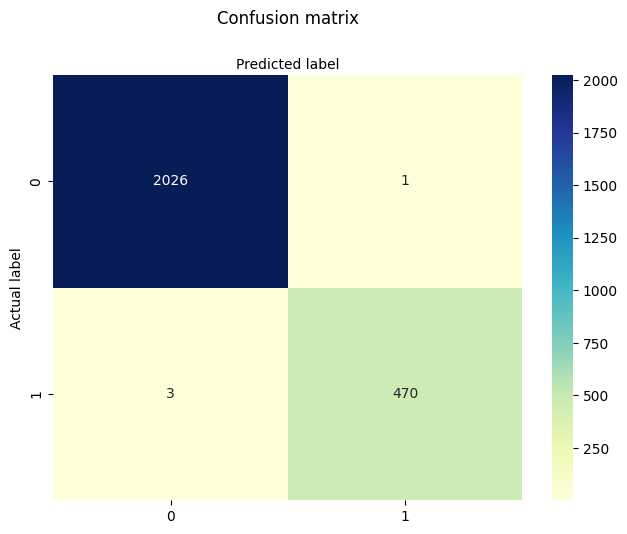

In [99]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


In [52]:
# (m * n)(n * p)
print(np.shape(X))
print(np.shape(y))

print(np.concatenate((y.T, X.T)))

(10000, 10)
(10000,)


ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 2 dimension(s) and the array at index 1 has 1 dimension(s)

In [48]:
endimensionell = np.ndarray((10,1))

print(endimensionell)

[[2.90200676e-315]
 [0.00000000e+000]
 [6.72707967e-310]
 [6.72707967e-310]
 [6.72707967e-310]
 [6.72707967e-310]
 [6.72707967e-310]
 [6.72707967e-310]
 [6.72707967e-310]
 [6.72707967e-310]]


In [60]:
grunddata = np.array([[1,1],[10,0],[4,0]])
print(np.shape(grunddata))
print(grunddata)
print(grunddata[:,1:1])
grunddata2 = np.array([[1],[1][0]])

concattat = np.concatenate((grunddata, grunddata2))

(3, 2)
[[ 1  1]
 [10  0]
 [ 4  0]]
[]


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.